In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
from ydata_profiling import ProfileReport as ydata_prof

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueError)

In [3]:
df = pd.read_csv("C:/Users/norri/Desktop/jbss_cass.csv", parse_dates=['DATE'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   104 non-null    datetime64[ns]
 1   display_s              104 non-null    float64       
 2   brand_branded_s        104 non-null    float64       
 3   brand_category_s       104 non-null    float64       
 4   brand_competitive_s    104 non-null    float64       
 5   product_branded_s      104 non-null    float64       
 6   product_category_s     104 non-null    float64       
 7   product_competitive_s  104 non-null    float64       
 8   competitive_all_s      104 non-null    float64       
 9   product_auto_s         104 non-null    float64       
 10  revenue                104 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 9.1 KB


In [73]:
# df.drop(['brand_auto_s', 'brand_auto_i'], axis=1, inplace=True)

For the remaining NAs, upon inspection their are no more than five per variable and they 
are all in the same location, preceded by zeroes. Filling by zeroes is not unreasonable

In [5]:
df.fillna(0, inplace=True)

In [6]:
print((df == 0).sum() / len(df))

DATE                     0.000000
display_s                0.567308
brand_branded_s          0.057692
brand_category_s         0.240385
brand_competitive_s      0.548077
product_branded_s        0.057692
product_category_s       0.057692
product_competitive_s    0.057692
competitive_all_s        0.057692
product_auto_s           0.057692
revenue                  0.000000
dtype: float64


Display and brand_competitive are both above 50% zeroes. Let's take note and see
what the rest of the EDA shows us

In [11]:
df_comp_sep = df[['brand_branded_s', 'product_branded_s', 'brand_competitive_s', 'product_category_s', 'product_competitive_s', 'revenue']]
df_comp_comb = df[['brand_branded_s', 'product_branded_s', 'product_category_s', 'competitive_all_s', 'revenue']]
df_p_comp = df[['brand_branded_s', 'product_branded_s', 'product_category_s', 'product_competitive_s', 'revenue']]
# df_no_dep = df.drop(['shipped_units', 'revenue', 'DATE'], axis=1)
# df_no_date = df[['display_s', 'brand_branded_s', 'brand_competitive_s', 'product_branded_s', 'product_category_s', 'product_competitive_s', 'product_auto_s', 'shipped_units', 'revenue']]

In [77]:
df.nunique()

DATE                   104
display                 46
brand_branded           99
brand_category          80
brand_competitive       49
product_branded         99
product_category        99
product_competitive     99
product_auto            99
revenue                104
dtype: int64

Looking for sufficient variance here. With units, they tend to have less variance.
We can verify variance with the KDE plots overlaying the histograms.

In [78]:
df.describe()

,DATE,display,brand_branded,brand_category,brand_competitive,product_branded,product_category,product_competitive,product_auto,revenue
count,104,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,2022-08-24 12:00:00,39.333654,278.928846,1208.032885,94.564327,793.644904,6726.723173,555.368654,2929.847692,292135.229231
min,2021-08-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163828.140000
25%,2022-02-25 06:00:00,0.000000,186.497500,3.070000,0.000000,467.777500,3535.832500,116.935000,1298.195000,264679.057500
50%,2022-08-24 12:00:00,0.000000,254.505000,181.645000,0.000000,794.785000,6945.140000,284.205000,2241.025000,292113.575000
75%,2023-02-20 18:00:00,17.727500,340.290000,2470.050000,152.817500,1118.402500,9645.525000,855.185000,4366.370000,317500.327500
max,2023-08-20 00:00:00,616.010000,909.910000,5064.540000,787.270000,1787.450000,14450.650000,2717.610000,10296.440000,438211.600000
std,NaN,117.615382,166.610081,1643.048012,147.958735,426.818354,3716.048948,604.639624,2136.702876,50624.689290


<Axes: xlabel='revenue', ylabel='Count'>

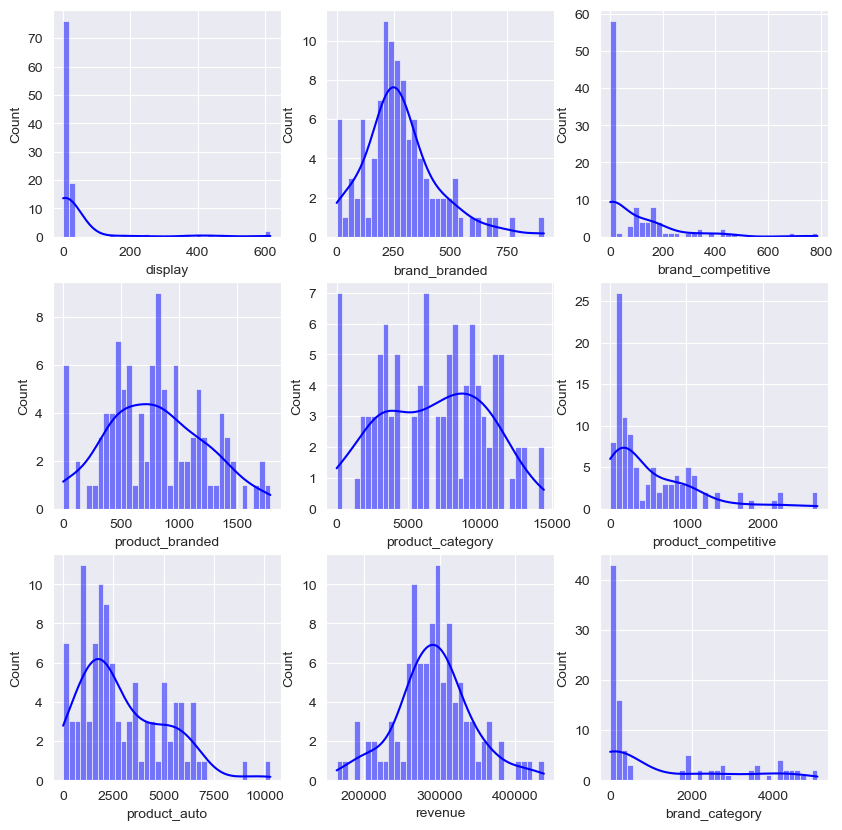

In [85]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
sns.histplot(df_no_date['display'], stat='count', kde=True, bins=int(180/5), ax=axes[0, 0], color = 'blue')
sns.histplot(df_no_date['brand_branded'], kde=True, bins=int(180/5), ax=axes[0, 1], color = 'blue')
sns.histplot(df_no_date['brand_competitive'], kde=True, bins=int(180/5), ax=axes[0, 2], color = 'blue')
sns.histplot(df_no_date['brand_category'], kde=True, bins=int(180/5), ax=axes[2, 2], color = 'blue')
sns.histplot(df_no_date['product_branded'], stat='count', kde=True, bins=int(180/5), ax=axes[1, 0], color = 'blue')
sns.histplot(df_no_date['product_category'], kde=True, bins=int(180/5), ax=axes[1, 1], color = 'blue')
sns.histplot(df_no_date['product_competitive'], kde=True, bins=int(180/5), ax=axes[1, 2], color = 'blue')
sns.histplot(df_no_date['product_auto'], stat='count', kde=True, bins=int(180/5), ax=axes[2, 0], color = 'blue')
sns.histplot(df_no_date['revenue'], kde=True, bins=int(180/5), ax=axes[2, 1], color = 'blue')

The variables with the significant percentage of zeroes are troublesome, but the remainder
look decent.

<Axes: >

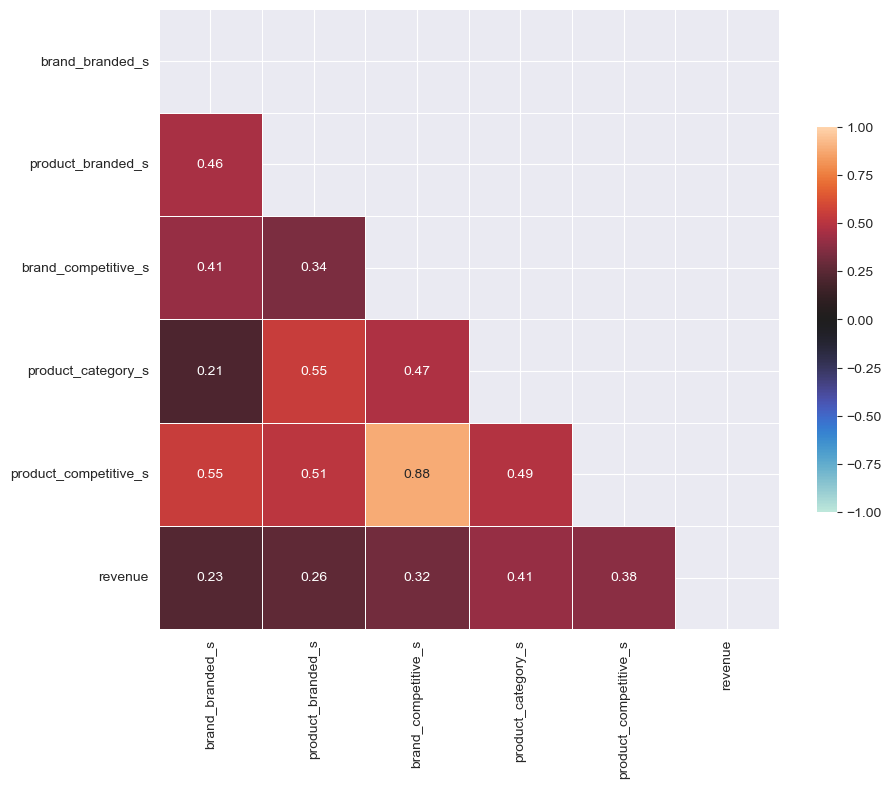

In [9]:
corr = df_comp_sep.corr(method="pearson").round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette('icefire', as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

With weak to no correlations with revenue and the same with shipped_units, 
the data may have difficulty in the MMM

<Axes: >

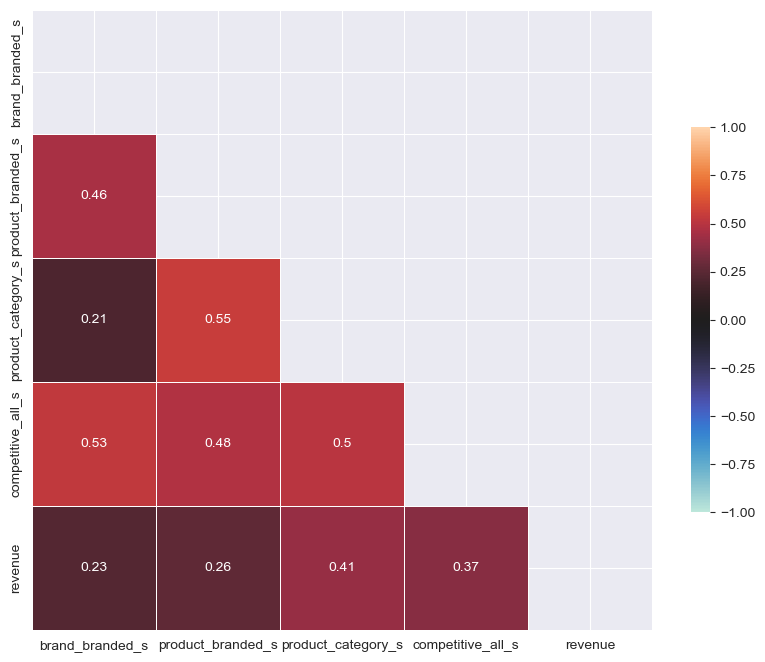

In [10]:
corr = df_comp_comb.corr(method="pearson").round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette('icefire', as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This section checks for outliers and approximates some idea of how extreme they are.
However, in Robyn, its converge() function that runs within the robyn_run() model
automatically winsorizes (adjusts upper and lower bounds of data input). This is just
a diagnostic if the model output is abnormal.

<Axes: >

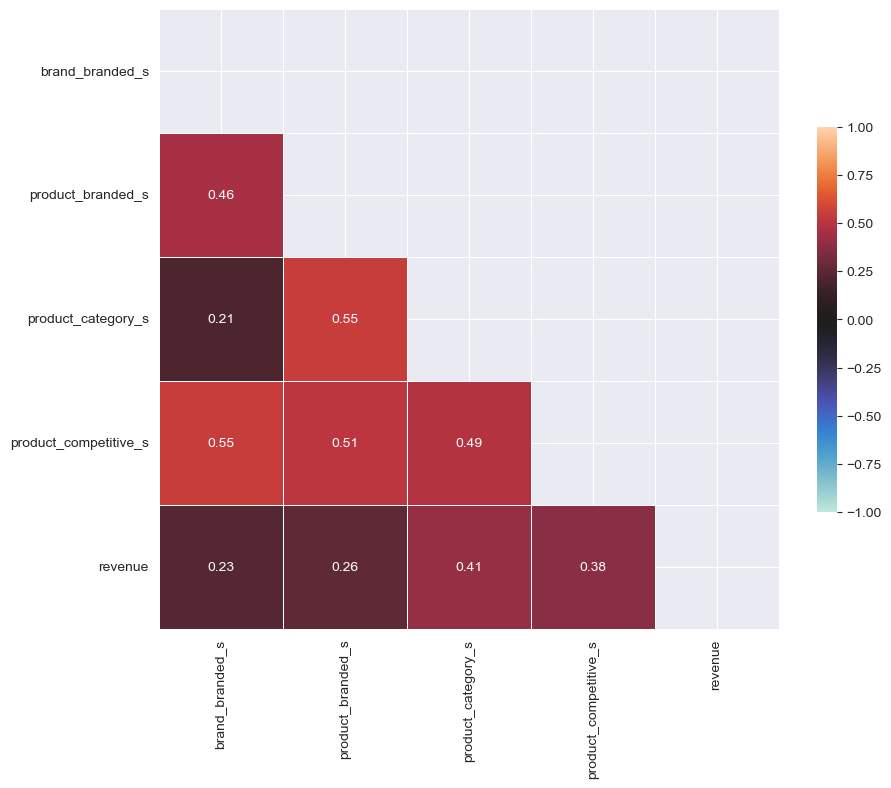

In [13]:
corr = df_p_comp.corr(method="pearson").round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette('icefire', as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
lower_q = df_p_comp.quantile(0.25)
upper_q = df_p_comp.quantile(0.75)
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)
outliers = df_p_comp[(df_p_comp < lower_bound) | (df_p_comp > upper_bound)]
print(outliers.count()/len(df))

brand_branded_s          0.057692
product_branded_s        0.000000
product_category_s       0.000000
product_competitive_s    0.048077
revenue                  0.076923
dtype: float64


With the large number of zeroes, any non-zero values could quickly become outliers.

These two modules make html reports that are quite good and can supplement for an EDA if the EDA is not available.
In addition, I chose them because they do a good Time Series analysis and export it.

In [82]:
# profile_y_basic = ydata_prof(df, title="Initial EDA")
# profile_y_basic.to_file("basic_eda.html")
# profile_y_ts = ydata_prof(df, tsmode=True, sortby="DATE", title='Time Series EDA')
# profile_y_ts.to_file("time_series_eda.html")

This also meets the basic criteria to be useful for Cassandra

In [83]:
# df.to_csv('jbss_cassandra.csv', index=False)